In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls","../input"]).decode("utf-8"))

# Any results you write to the current directory are saved as output.

combats.csv
pokemon.csv
tests.csv



In [85]:
data = pd.read_csv('../input/pokemon.csv')

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [87]:
data.corr() # değerler arası ilişkileri belirmek 
#Korelasyon, olasılık kuramı ve istatistikte iki rassal değişken arasındaki doğrusal ilişkinin yönünü ve gücünü belirtir.

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


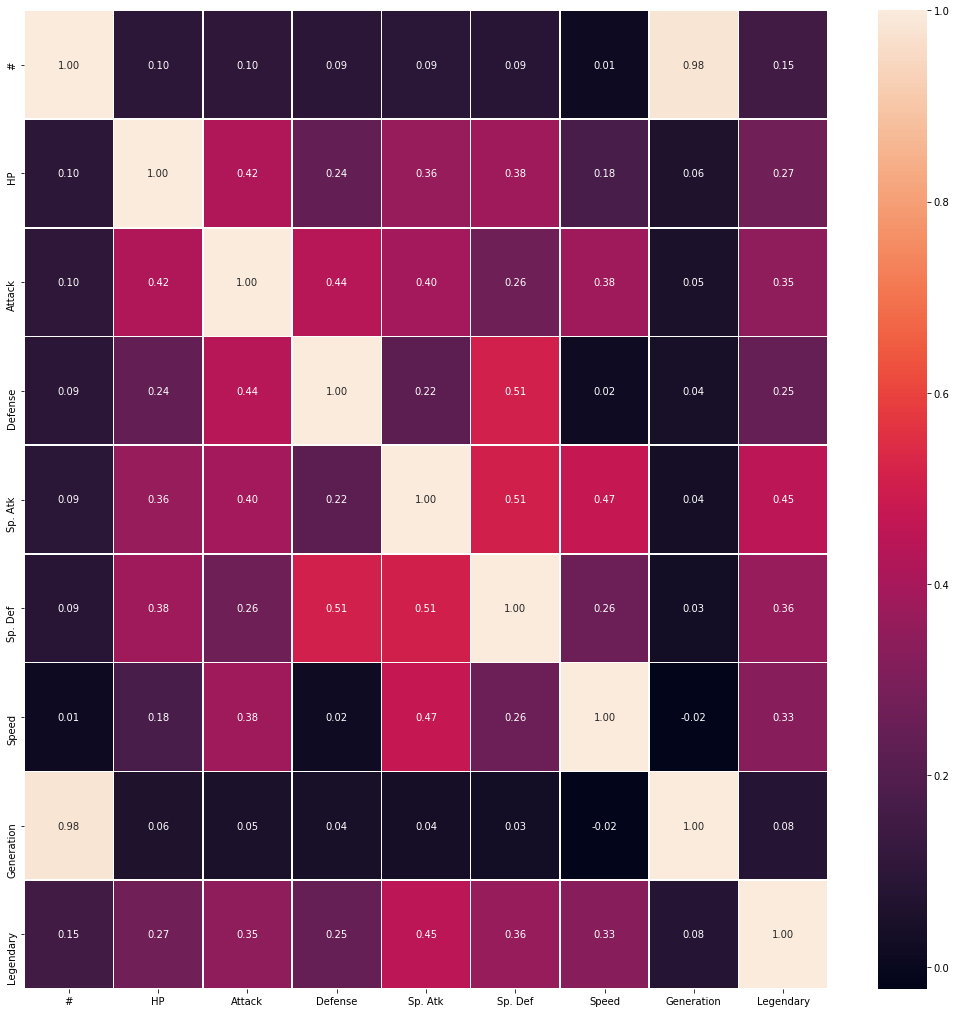

In [88]:
# correlation map
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt='.2f',ax=ax)
# figsize=(18,18) --> Boyutu ayarladık
# annot = True --> kutu içinde değerlerin gösteriyor.
# linewidths=.5 --> kutular arası boşluk belirtiyor.
# fmt='.1f' --> Ondalıklı sayılarda virgülden sonra kaç basamak yazılacağını belirtiyor.

plt.show()

In [89]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

**Introduction to Python**

**Matplotlib**

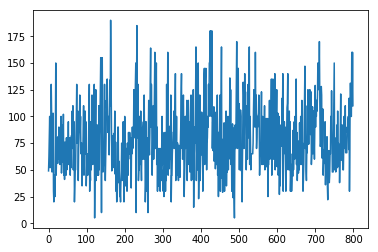

In [90]:
data.Attack.plot(kind='line') # Line türü grafik çizdirdik.
plt.show()

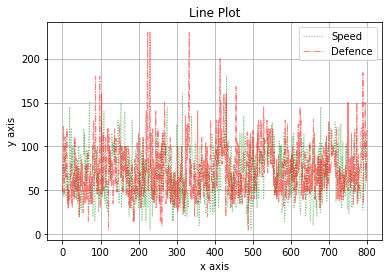

In [91]:
data.Speed.plot(kind = 'line', color='g', label='Speed', linewidth=1, alpha=0.5, grid=True, linestyle=':' )
data.Defense.plot(color='r', label='Defence', linewidth=1, alpha=0.5, grid=True, linestyle='-.')
plt.legend(loc='upper right')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Line Plot')
plt.show()

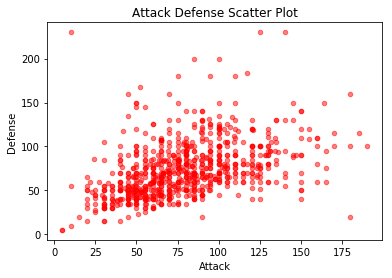

In [92]:
# x = attack , y = defense
data.plot(kind='scatter', x='Attack', y='Defense', alpha=0.5, color='red')
# plt.scatter(data.Attack,data.Defense)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack Defense Scatter Plot')
plt.show()

#plt.scatter(data.Attack,data.Defense, alpha=0.5, color='red')

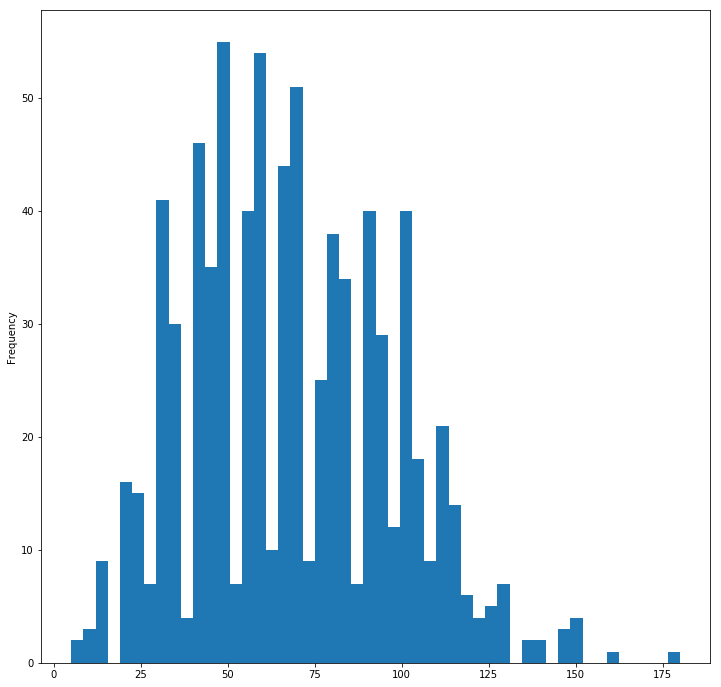

In [93]:
data.Speed.plot(kind='hist', bins=50, figsize=(12,12))
plt.show()

#plt.hist(data.Speed, bins=50)

In [94]:
data.Speed.plot(kind='hist', bins=50, figsize=(12,12))
plt.clf()
# plt.clf() --> Clear

<Figure size 864x864 with 0 Axes>

**Dictionary, Pandas and Logic Control
**

In [95]:
dictionary = {'Fire':'Charmander', 'Grass':'Bulbasaur', 'Water':'Squirtle'}
print(dictionary.keys())
print(dictionary.values())

dict_keys(['Fire', 'Grass', 'Water'])
dict_values(['Charmander', 'Bulbasaur', 'Squirtle'])


In [96]:
dictionary['Fire'] = "Charizard" # deger değistirme
print(dictionary)

dictionary['Bug'] = "Butterfree" # yeni ekleme
print(dictionary)

del dictionary['Grass'] # silme
print(dictionary)

print('Bug' in dictionary)

dictionary.clear() # tamamen siliyor.
print(dictionary)

del dictionary # dictionary siler.
# print(dictionary) hata verir çünkü silmiştik.

{'Fire': 'Charizard', 'Grass': 'Bulbasaur', 'Water': 'Squirtle'}
{'Fire': 'Charizard', 'Grass': 'Bulbasaur', 'Water': 'Squirtle', 'Bug': 'Butterfree'}
{'Fire': 'Charizard', 'Water': 'Squirtle', 'Bug': 'Butterfree'}
True
{}


In [97]:
series = data['Defense']
print(type(series))
data_frame = data[['Defense']]
print(type(data_frame))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [98]:
# Filtering pandas data frame
x = data['Defense'] > 200 # defansı 200'den büyük olanlar
data[x]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [99]:
data[np.logical_and(data['Defense']>200, data['Attack']>100)]
# savunması 200'den büyük olanlar ve saldırısı 100'den büyük olanlar.
# data[(data['Defense']>200) & (data['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [100]:
data["Type 1"].unique()
# Type 1'de bulunan bütün türleri yazdırdık.

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [101]:
data[(data['Type 1'] == 'Dragon')] 
# Type 1, Dragon olanları aldık.

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
159,160,Dratini,Dragon,NaN,41,64,45,50,50,50,1,False
160,161,Dragonair,Dragon,NaN,61,84,65,70,70,70,1,False
161,162,Dragonite,Dragon,Flying,91,134,95,100,100,80,1,False
365,366,Altaria,Dragon,Flying,75,70,90,70,105,80,3,False
366,367,Mega Altaria,Dragon,Fairy,75,110,110,110,105,80,3,False
406,407,Bagon,Dragon,NaN,45,75,60,40,30,50,3,False
407,408,Shelgon,Dragon,NaN,65,95,100,60,50,50,3,False
408,409,Salamence,Dragon,Flying,95,135,80,110,80,100,3,False
409,410,Mega Salamence,Dragon,Flying,95,145,130,120,90,120,3,False
417,418,Latias,Dragon,Psychic,80,80,90,110,130,110,3,True


**List Comprehension**

In [102]:
threshold = sum(data.Speed)/len(data.Speed) # hızların ortalaması
print("threshold = ",threshold)
data["speed_level"] = ["high" if i > threshold else "low" for i in data.Speed]
data.loc[:10,["speed_level","Speed"]]

threshold =  68.2775


,speed_level,Speed
0,low,45
1,low,60
2,high,80
3,high,80
4,low,65
5,high,80
6,high,100
7,high,100
8,high,100
9,low,43


In [103]:
#List Comprehension
num1 = [5,10,15]
num2 = [i**2 if i == 10 else i-5 if i<7 else i+5 for i in num1]

num3 =[i*9 if i == 10 else i+10000 if i==15 else i*0 if i==5 else i-90 for i in num1]
print("Num1 : ",num1)
print("Num2 : ",num2)
print("Num3 : ",num3)
# [islem1 if koşul1 else islme2 if koşul2 else işlem3 if koşul3 else islem for döngüsü]

Num1 :  [5, 10, 15]
Num2 :  [0, 100, 20]
Num3 :  [0, 90, 10015]


**CLEANING DATA**

Diagnose Data for Cleaning

In [104]:
data.head() # head shows first 5 rows
# data.head(7)  show first 7 rows

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,low
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,low
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,high
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,high
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,low


In [105]:
data.tail() # tail shows last 5 rows

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,low
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,high
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,high
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,high
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True,high


In [106]:
data.shape # (800,13) ---> (rows,colums)

(800, 13)

**Exploratory Data Analysis (EDA)**

In [107]:
data['Type 1'].value_counts()  # Type 1 türlerinden kaçar tane pokemon var

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ghost        32
Dragon       32
Ground       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [108]:
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


25% ---> Lower Quartile

50% ---> Median

75% ---> Upper Quartile

**Visual Exploratory Data Analysis**

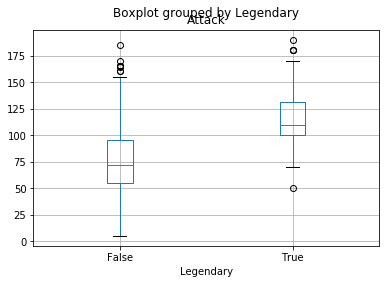

In [109]:
data.boxplot(column='Attack', by='Legendary')
plt.show()

**Tidy and Pivoting Data******

In [110]:
data_new = data.head()
data_new

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,low
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,low
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,high
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,high
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,low


In [111]:
# melt() ----> Datayı şekillendiriyoruz. 
#Name sutunu kalsın. ----> id_vars
#Attack ve Defense, variable adında yeni bir sutuna ata ----> value_vars  
#Attack ve Defense değerlerini value adında yeni bir sutuna ata (value()) ----> value_vars   
melted = pd.melt(frame=data_new, id_vars='Name', value_vars=['Attack','Defense'])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


In [112]:
# Pivoting ----> melt ile yaptığımızı eski haline getiriyor.
melted.pivot(index='Name', columns='variable', values='value')

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


**Concatenating Data and Data Types**

Concatenating Data

In [113]:
data1 = data.head()
data2 = data.tail()
conc_data_row = pd.concat([data1,data2],axis = 0,ignore_index=True)
conc_data_row
# Satır olarak birleştirme

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,low
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,low
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,high
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,high
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,low
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,low
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,high
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,high
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,high
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True,high


In [114]:
data1 = data['Attack'].head()
data2 = data['Defense'].head()
conc_data_col = pd.concat([data1,data2], axis=1)
conc_data_col
# Stusun olarak ekleme

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


Concatenating Data

In [115]:
data.dtypes

#               int64
Name           object
Type 1         object
Type 2         object
HP              int64
Attack          int64
Defense         int64
Sp. Atk         int64
Sp. Def         int64
Speed           int64
Generation      int64
Legendary        bool
speed_level    object
dtype: object

In [116]:
data['Type 1'] = data['Type 1'].astype('category')
data['Speed'] = data['Speed'].astype('float')
data.dtypes
# Type 1 = object -----> Type 1 = category çevirdik.
# Speed = int64 -----> Speed = float çevirdik.

#                 int64
Name             object
Type 1         category
Type 2           object
HP                int64
Attack            int64
Defense           int64
Sp. Atk           int64
Sp. Def           int64
Speed           float64
Generation        int64
Legendary          bool
speed_level      object
dtype: object

**Missing Data and Testing with Assert**

In [117]:
data.info() # Type2 ----> 414 non-null object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#              800 non-null int64
Name           799 non-null object
Type 1         800 non-null category
Type 2         414 non-null object
HP             800 non-null int64
Attack         800 non-null int64
Defense        800 non-null int64
Sp. Atk        800 non-null int64
Sp. Def        800 non-null int64
Speed          800 non-null float64
Generation     800 non-null int64
Legendary      800 non-null bool
speed_level    800 non-null object
dtypes: bool(1), category(1), float64(1), int64(7), object(3)
memory usage: 71.2+ KB


In [118]:
data['Type 2'].value_counts(dropna = False)
# dropna = False ----> Kaç Nan değeri var onu veriyor. 386 Nan -> Mising value

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Water        14
Ghost        14
Rock         14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [119]:
data1 = data
data1["Type 2"].dropna(inplace = True)
# Type 2'si olmayan pokemonları attık.

In [120]:
assert 1==1 #kontrol ediyo. Bir şey döndürmezse doğrudur.

In [121]:
assert data['Type 2'].notnull().all() 
# Type 2'si olmayanlar atmışız.

In [122]:
data["Type 2"].fillna('empty',inplace = True) 
# Type2 empty ile doldurduk.

In [123]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False,low
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False,low
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False,high
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False,high
4,5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False,low


In [124]:
assert data.columns[1] == 'Name' # bir şey döndürmicek
# assert data.columns[1] == 'HP' # hata verir.

In [125]:
data.Speed.dtypes

dtype('float64')

In [126]:
assert data.Speed.dtypes == np.float64

**Pandas Foundation**

Review of Pandas, Building Data Frames from Scratch,Visual and Statistical EDA

In [127]:
pokemons = ['Bulbasaur','Charmander']
attack = ['49','52']
list_label = ['pokemons','attack']
list_col = [pokemons,attack]
zipped = list(zip(list_label,list_col))
data_dict = dict(zipped)
df = pd.DataFrame(data_dict)
# listtelerden -> dic -> dataframe yarattık.
df

,pokemons,attack
0,Bulbasaur,49
1,Charmander,52


In [128]:
df["Defense"] = ['49','43'] # yeni bir colums oluşturduk
df

,pokemons,attack,Defense
0,Bulbasaur,49,49
1,Charmander,52,43


In [129]:
# Broadcasting
df["Generation"] = 1 # Generation, columns bütün değerler = 1
df

,pokemons,attack,Defense,Generation
0,Bulbasaur,49,49,1
1,Charmander,52,43,1


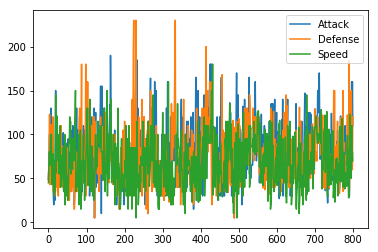

In [130]:
data1 = data.loc[:,['Attack','Defense','Speed']]
data1.plot()
plt.show()

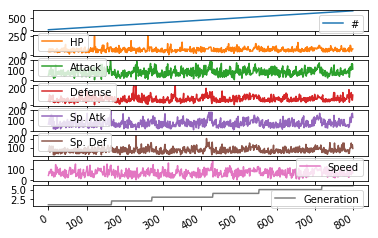

In [131]:
data.plot(subplots = True)
plt.show()

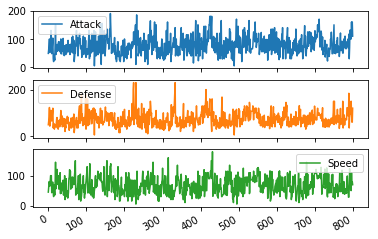

In [132]:
data1.plot(subplots=True)
plt.show()

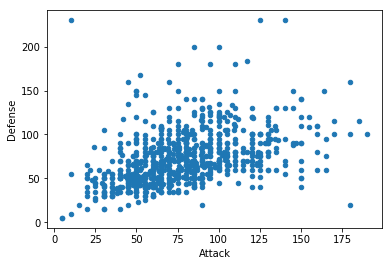

In [133]:
data1.plot(kind='scatter', x = 'Attack', y = 'Defense')
plt.show()

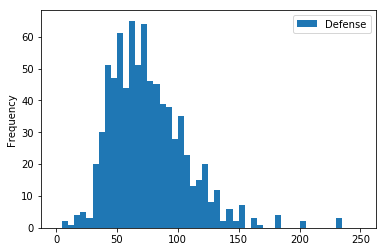

In [134]:
data1.plot(kind='hist',y = 'Defense',bins=50,range=(0,250))
plt.show()

# range ----> 0'dan 250 kadar istedik.
# normed=True -----> normalize etme.

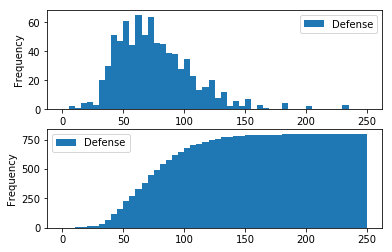

In [135]:
fig, axes= plt.subplots(nrows=2, ncols=1)
data1.plot(kind='hist',y='Defense',bins=50,range=(0,250),ax=axes[0])
data1.plot(kind='hist', y='Defense',bins=50,range=(0,250),ax=axes[1],cumulative= True)
plt.savefig('graph.png')


Indexing and Resampling Pandas Time Series

In [136]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False,low
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False,low
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False,high
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False,high
4,5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False,low


In [137]:
time_list = ["1975-07-08","1980-04-17"]
print(type(time_list[1]))

datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))

<class 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [138]:
import warnings
warnings.filterwarnings('ignore')

data2 = data.head()
date_list = ["1975-07-08","1980-04-17","1980-05-17","1980-08-22","1990-04-29"]
datetime_objects = pd.to_datetime(date_list)
data2["date"] = datetime_objects

data2 = data2.set_index("date")
data2

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
date,,,,,,,,,,,,,
1975-07-08,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False,low
1980-04-17,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False,low
1980-05-17,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False,high
1980-08-22,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False,high
1990-04-29,5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False,low


In [139]:
print(data2.loc["1975-07-08"])

#                      1
Name           Bulbasaur
Type 1             Grass
Type 2            Poison
HP                    45
Attack                49
Defense               49
Sp. Atk               65
Sp. Def               65
Speed                 45
Generation             1
Legendary          False
speed_level          low
Name: 1975-07-08 00:00:00, dtype: object


In [140]:
print(data2.loc["1980-05-17":"1990-04-29"])

            #           Name     ...     Legendary speed_level
date                             ...                          
1980-05-17  3       Venusaur     ...         False        high
1980-08-22  4  Mega Venusaur     ...         False        high
1990-04-29  5     Charmander     ...         False         low

[3 rows x 13 columns]


In [141]:
data2.resample("A").mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1975-12-31,1.0,45.000000,49.000000,49.000000,65.000000,65.0,45.000000,1.0,0.0
1976-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-31,3.0,73.333333,81.333333,89.666667,100.666667,100.0,73.333333,1.0,0.0
1981-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
data2.resample("M").mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1975-07-31,1.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1975-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
data2.resample("M").first().interpolate("linear")
# lineer olarak dolduruyor.

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
date,,,,,,,,,,,,,
1975-07-31,1.000000,Bulbasaur,Grass,Poison,45.000000,49.000000,49.000000,65.000000,65.000000,45.000000,1.0,False,low
1975-08-31,1.017544,NaN,NaN,NaN,45.263158,49.228070,49.245614,65.263158,65.263158,45.263158,1.0,NaN,NaN
1975-09-30,1.035088,NaN,NaN,NaN,45.526316,49.456140,49.491228,65.526316,65.526316,45.526316,1.0,NaN,NaN
1975-10-31,1.052632,NaN,NaN,NaN,45.789474,49.684211,49.736842,65.789474,65.789474,45.789474,1.0,NaN,NaN
1975-11-30,1.070175,NaN,NaN,NaN,46.052632,49.912281,49.982456,66.052632,66.052632,46.052632,1.0,NaN,NaN
1975-12-31,1.087719,NaN,NaN,NaN,46.315789,50.140351,50.228070,66.315789,66.315789,46.315789,1.0,NaN,NaN
1976-01-31,1.105263,NaN,NaN,NaN,46.578947,50.368421,50.473684,66.578947,66.578947,46.578947,1.0,NaN,NaN
1976-02-29,1.122807,NaN,NaN,NaN,46.842105,50.596491,50.719298,66.842105,66.842105,46.842105,1.0,NaN,NaN
1976-03-31,1.140351,NaN,NaN,NaN,47.105263,50.824561,50.964912,67.105263,67.105263,47.105263,1.0,NaN,NaN


**Manipulating Data Frames with Pandas**

In [144]:
data = data.set_index('#')
data.head()
# index 0'dan başlıyodu şimdi 1'den başlıyor.

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False,low
2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False,low
3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False,high
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False,high
5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False,low


In [145]:
data['HP'][1]

45

In [146]:
data.HP[1]

45

In [147]:
data.loc[1,['HP']]

HP    45
Name: 1, dtype: object

In [148]:
data[['HP','Attack']]

,HP,Attack
#,,
1,45,49
2,60,62
3,80,82
4,80,100
5,39,52
6,58,64
7,78,84
8,78,130
9,78,104


**SLICING DATA FRAME**

In [149]:
print(type(data['HP'])) # ----> series
print(type(data[['HP']])) # -----> DataFrame

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [150]:
data.loc[1:10,"HP":"Defense"] # ----> 1'den 10'a kadar ve HP'den Defense kadar verdi.

,HP,Attack,Defense
#,,,
1,45,49,49
2,60,62,63
3,80,82,83
4,80,100,123
5,39,52,43
6,58,64,58
7,78,84,78
8,78,130,111
9,78,104,78


In [151]:
data.loc[10:1:-1,"HP":"Defense"] #-----> ters yazdırdık.

,HP,Attack,Defense
#,,,
10,44,48,65
9,78,104,78
8,78,130,111
7,78,84,78
6,58,64,58
5,39,52,43
4,80,100,123
3,80,82,83
2,60,62,63


In [152]:
data.loc[1:10,"Speed":] # -----> 1'den 10'a kadar ve Speed'den sonrakileri aldık

,Speed,Generation,Legendary,speed_level
#,,,,
1,45.0,1,False,low
2,60.0,1,False,low
3,80.0,1,False,high
4,80.0,1,False,high
5,65.0,1,False,low
6,80.0,1,False,high
7,100.0,1,False,high
8,100.0,1,False,high
9,100.0,1,False,high


**FILTERING DATA FRAMES**

In [153]:
boolean = data.HP > 200
data[boolean]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
#,,,,,,,,,,,,
122,Chansey,Normal,NaN,250,5,5,35,105,50.0,1,False,low
262,Blissey,Normal,NaN,255,10,10,75,135,55.0,2,False,low


In [154]:
first_filter = data.HP > 150
second_filter = data.Speed > 35
data[first_filter & second_filter]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
#,,,,,,,,,,,,
122,Chansey,Normal,NaN,250,5,5,35,105,50.0,1,False,low
262,Blissey,Normal,NaN,255,10,10,75,135,55.0,2,False,low
352,Wailord,Water,NaN,170,90,45,90,45,60.0,3,False,low
656,Alomomola,Water,NaN,165,75,80,40,45,65.0,5,False,low


In [155]:
data.HP[data.Speed<15]

#
231     20
360     45
487     50
496    135
659     44
Name: HP, dtype: int64

**TRANSFORMING DATA**

In [156]:
def div(n):
    return n/2
data.HP.apply(div)

#
1      22.5
2      30.0
3      40.0
4      40.0
5      19.5
6      29.0
7      39.0
8      39.0
9      39.0
10     22.0
11     29.5
12     39.5
13     39.5
14     22.5
15     25.0
16     30.0
17     20.0
18     22.5
19     32.5
20     32.5
21     20.0
22     31.5
23     41.5
24     41.5
25     15.0
26     27.5
27     20.0
28     32.5
29     17.5
30     30.0
       ... 
771    47.5
772    39.0
773    33.5
774    25.0
775    22.5
776    34.0
777    45.0
778    28.5
779    21.5
780    42.5
781    24.5
782    22.0
783    27.0
784    29.5
785    32.5
786    27.5
787    37.5
788    42.5
789    27.5
790    47.5
791    20.0
792    42.5
793    63.0
794    63.0
795    54.0
796    25.0
797    25.0
798    40.0
799    40.0
800    40.0
Name: HP, Length: 800, dtype: float64

In [157]:
data.HP.apply(lambda n: n/2)

#
1      22.5
2      30.0
3      40.0
4      40.0
5      19.5
6      29.0
7      39.0
8      39.0
9      39.0
10     22.0
11     29.5
12     39.5
13     39.5
14     22.5
15     25.0
16     30.0
17     20.0
18     22.5
19     32.5
20     32.5
21     20.0
22     31.5
23     41.5
24     41.5
25     15.0
26     27.5
27     20.0
28     32.5
29     17.5
30     30.0
       ... 
771    47.5
772    39.0
773    33.5
774    25.0
775    22.5
776    34.0
777    45.0
778    28.5
779    21.5
780    42.5
781    24.5
782    22.0
783    27.0
784    29.5
785    32.5
786    27.5
787    37.5
788    42.5
789    27.5
790    47.5
791    20.0
792    42.5
793    63.0
794    63.0
795    54.0
796    25.0
797    25.0
798    40.0
799    40.0
800    40.0
Name: HP, Length: 800, dtype: float64

In [158]:
data["total_power"] = data.Attack + data.Defense
# total_power adında yeni bir sutun oluşturduk.
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level,total_power
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False,low,98
2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False,low,125
3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False,high,165
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False,high,223
5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False,low,95


**INDEX OBJECTS AND LABELED DATA**

In [159]:
print(data.index.name) # ----->  data.index.name = #

data.index.name = "index_name" # ismi değiştirdik. # yerine index_name yaptık
data.head()

#


,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level,total_power
index_name,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False,low,98
2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False,low,125
3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False,high,165
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False,high,223
5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False,low,95


In [160]:
data3 = data.copy() #  kopyaladık
data3.index = range(100,900,1) # 100 başlattık 900'e kadar birer birer arttırdık.  
data3.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level,total_power
100,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False,low,98
101,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False,low,125
102,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False,high,165
103,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False,high,223
104,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False,low,95


**HIERARCHICAL INDEXING**

In [163]:
data1 = data.set_index(['Type 1','Type 2'])
data1.head(100)

# Type 1 ve Type 2'yi index haline getirdik.

Name   HP     ...       speed_level  total_power
Type 1   Type 2                             ...                               
Grass    Poison          Bulbasaur   45     ...               low           98
         Poison            Ivysaur   60     ...               low          125
         Poison           Venusaur   80     ...              high          165
         Poison      Mega Venusaur   80     ...              high          223
Fire     NaN            Charmander   39     ...               low           95
         NaN            Charmeleon   58     ...              high          122
         Flying          Charizard   78     ...              high          162
         Dragon   Mega Charizard X   78     ...              high          241
         Flying   Mega Charizard Y   78     ...              high          182
Water    NaN              Squirtle   44     ...               low          113
         NaN             Wartortle   59     ...               low          143
         NaN             Blastoise   79     ...              high          183
         NaN        Mega Blastoise   79     ...              high          223
Bug      NaN              Caterpie   45     ...               low           65
         NaN               Metapod   50     ...               low           75
         Flying         Butterfree   60     ...              high           95
         Poison             Weedle   40     ...               low           65
         Poison             Kakuna   45     ...               low           75
         Poison           Beedrill   65     ...              high          130
         Poison      Mega Beedrill   65     ...              high          190
Normal   Flying             Pidgey   40     ...               low           85
         Flying          Pidgeotto   63     ...              high          115
         Flying            Pidgeot   83     ...              high          155
         Flying       Mega Pidgeot   83     ...              high          160
         NaN               Rattata   30     ...              high           91
         NaN              Raticate   55     ...              high          141
         Flying            Spearow   40     ...              high           90
         Flying             Fearow   65     ...              high          155
Poison   NaN                 Ekans   35     ...               low          104
         NaN                 Arbok   60     ...              high          154
...                            ...  ...     ...               ...          ...
Psychic  NaN              Alakazam   55     ...              high           95
         NaN         Mega Alakazam   55     ...              high          115
Fighting NaN                Machop   70     ...               low          130
         NaN               Machoke   80     ...               low          170
         NaN               Machamp   90     ...               low          210
Grass    Poison         Bellsprout   50     ...               low          110
         Poison         Weepinbell   65     ...               low          140
         Poison         Victreebel   80     ...              high          170
Water    Poison          Tentacool   40     ...              high           75
         Poison         Tentacruel   80     ...              high          135
Rock     Ground            Geodude   40     ...               low          180
         Ground           Graveler   55     ...               low          210
         Ground              Golem   80     ...               low          250
Fire     NaN                Ponyta   50     ...              high          140
         NaN              Rapidash   65     ...              high          170
Water    Psychic          Slowpoke   90     ...               low          130
         Psychic           Slowbro   95     ...               low          185
         Psychic      Mega Slowbro   95     ...               low          255
E

**PIVOTING DATA FRAMES**

In [164]:
dic = {"treatment":["A","A","B","B"],"gender":["F","M","F","M"],"response":[10,45,5,9],"age":[15,4,72,65]}
df = pd.DataFrame(dic)
df

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [165]:
df.pivot(index="treatment",columns="gender",values="response")

gender,F,M
treatment,,
A,10,45
B,5,9


**STACKING and UNSTACKING DATAFRAME**

In [166]:
df1 = df.set_index(["treatment","gender"])
df1

response  age
treatment gender               
A         F             10   15
          M             45    4
B         F              5   72
          M              9   65

In [167]:
df1.unstack(level=0)

response    age    
treatment        A  B   A   B
gender                       
F               10  5  15  72
M               45  9   4  65

In [169]:
df1.unstack(level=1)

response     age    
gender           F   M   F   M
treatment                     
A               10  45  15   4
B                5   9  72  65

In [170]:
df2 = df1.swaplevel(0,1)
df2

,,response,age
gender,treatment,,
F,A,10,15
M,A,45,4
F,B,5,72
M,B,9,65


**MELTING DATA FRAMES**

In [171]:
df

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [173]:
pd.melt(df,id_vars="treatment",value_vars=["age","response"])

,treatment,variable,value
0,A,age,15
1,A,age,4
2,B,age,72
3,B,age,65
4,A,response,10
5,A,response,45
6,B,response,5
7,B,response,9


**CATEGORICALS AND GROUPBY**

In [174]:
df

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [175]:
df.groupby("treatment").mean() 
# ortalamalarına göre grupladık.

,response,age
treatment,,
A,27.5,9.5
B,7.0,68.5


In [176]:
df.groupby("treatment").age.max()
# maksimumlarına göre grupladık.

treatment
A    15
B    72
Name: age, dtype: int64

In [177]:
df.groupby("treatment")[["age","response"]].min()

,age,response
treatment,,
A,4,10
B,65,5


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
treatment    4 non-null object
gender       4 non-null object
response     4 non-null int64
age          4 non-null int64
dtypes: int64(2), object(2)
memory usage: 208.0+ bytes
